In [20]:
from scripts import setup_environment

setup_environment()

In [21]:
from scripts.dataset import BrainteaserDataset

dataset = BrainteaserDataset("data")

In [22]:
import string

from scripts.dataset import RiddleQuestion
from scripts.prompt_helpers import create_prompt_template


def args_generator(riddle_question: RiddleQuestion):
    template_args = {
        "question": riddle_question.question,
        "choices": "\n".join(
            [
                f"({string.ascii_uppercase[j]}) {choice}"
                for j, choice in enumerate(riddle_question.choice_list)
            ]
        ),
    }

    return template_args


chat_prompt_template = create_prompt_template("default")

In [ ]:
from scripts.lmm import OllamaModelBuilder
from scripts.executor import Executor

base_url = "http://108.179.129.43:32301"
# Ensure that the temperature is set to 0.0f, otherwise the model could be unstable due to taking risks
# but this will also make the model less creative. As we are interested in the stability of the model, this is not a problem.
model_builder = OllamaModelBuilder(base_url)

executor = Executor(
    models=[
        # Llama3.1
        model_builder.build_model("llama3.1:8b"),
        # Llama3.2
        model_builder.build_model("llama3.2:1b"),
        model_builder.build_model("llama3.2:3b"),
        # Phi3.5
        model_builder.build_model("phi3.5:3.8b"),
        # Phi4
        model_builder.build_model("phi4:14b"),
        # Qwen2.5
        model_builder.build_model("qwen2.5:0.5b"),
        model_builder.build_model("qwen2.5:1.5b"),
        model_builder.build_model("qwen2.5:3b"),
        model_builder.build_model("qwen2.5:7b"),
        model_builder.build_model("qwen2.5:14b"),
        model_builder.build_model("qwen2.5:32b"),
        # Gemma2
        model_builder.build_model("gemma2:2b"),
        model_builder.build_model("gemma2:9b"),
        model_builder.build_model("gemma2:27b"),
        # Mistral Nemo
        model_builder.build_model("mistral-nemo:12b"),
    ]
)

2025-03-02 23:38:41,329 - INFO - Initialized executor with 15 models.


In [24]:
import numpy as np

from scripts.executor import Dataset

# Set fixed seed for reproducibility
np.random.seed(42)


def create_test_dataset(data: list[RiddleQuestion], name: str, percentage: float = 0.1):
    """Create a test dataset by randomly sampling a percentage of the original data."""
    indices = np.random.choice(
        len(data), size=int(len(data) * percentage), replace=False
    )
    return Dataset(name=name, riddles=[data[i] for i in indices])


# Create test datasets
sp_data = create_test_dataset(dataset.sp, "sp")
wp_data = create_test_dataset(dataset.wp, "wp")

# Prepare executor data
executor_data = [sp_data, wp_data]

In [25]:
total_results = {}

for run_index in range(5):
    chat_prompt_template = create_prompt_template("default")
    results = await executor.aexecute(
        executor_data,
        chat_prompt_template,
        args_generator,
        dump_to_pickle=True,
        create_checkpoints=True,
        resume_from_checkpoint=True,
        run_name="model_stability_test",
        file_name_suffix=f"run_{run_index}",
    )
    total_results[run_index] = results

2025-03-02 23:38:41,413 - INFO - Starting execution 'model-stability-test with suffix 'run_0_temp_default'': 2 dataset(s) x 15 model(s) = 1665 riddle evaluations


model-stability-test(run-0-temp-default):   0%|          | 0/1665 [00:00<?, ?it/s]

2025-03-02 23:50:31,973 - INFO - Saving results to results/model-stability-test/model-stability-test_run-0-temp-default_results.pkl
2025-03-02 23:50:32,492 - INFO - Execution 'model-stability-test with suffix 'run_0_temp_default'' completed successfully.
2025-03-02 23:50:32,498 - INFO - Starting execution 'model-stability-test with suffix 'run_1_temp_default'': 2 dataset(s) x 15 model(s) = 1665 riddle evaluations


model-stability-test(run-1-temp-default):   0%|          | 0/1665 [00:00<?, ?it/s]

2025-03-03 00:01:48,400 - INFO - Saving results to results/model-stability-test/model-stability-test_run-1-temp-default_results.pkl
2025-03-03 00:01:48,891 - INFO - Execution 'model-stability-test with suffix 'run_1_temp_default'' completed successfully.
2025-03-03 00:01:48,892 - INFO - Starting execution 'model-stability-test with suffix 'run_2_temp_default'': 2 dataset(s) x 15 model(s) = 1665 riddle evaluations


model-stability-test(run-2-temp-default):   0%|          | 0/1665 [00:00<?, ?it/s]

2025-03-03 00:13:34,324 - INFO - Saving results to results/model-stability-test/model-stability-test_run-2-temp-default_results.pkl
2025-03-03 00:13:34,851 - INFO - Execution 'model-stability-test with suffix 'run_2_temp_default'' completed successfully.
2025-03-03 00:13:34,852 - INFO - Starting execution 'model-stability-test with suffix 'run_3_temp_default'': 2 dataset(s) x 15 model(s) = 1665 riddle evaluations


model-stability-test(run-3-temp-default):   0%|          | 0/1665 [00:00<?, ?it/s]

2025-03-03 00:25:50,581 - INFO - Saving results to results/model-stability-test/model-stability-test_run-3-temp-default_results.pkl
2025-03-03 00:25:51,088 - INFO - Execution 'model-stability-test with suffix 'run_3_temp_default'' completed successfully.
2025-03-03 00:25:51,090 - INFO - Starting execution 'model-stability-test with suffix 'run_4_temp_default'': 2 dataset(s) x 15 model(s) = 1665 riddle evaluations


model-stability-test(run-4-temp-default):   0%|          | 0/1665 [00:00<?, ?it/s]

2025-03-03 00:38:14,315 - INFO - Saving results to results/model-stability-test/model-stability-test_run-4-temp-default_results.pkl
2025-03-03 00:38:14,822 - INFO - Execution 'model-stability-test with suffix 'run_4_temp_default'' completed successfully.


## Eval results


In [ ]:
import os
import glob
import pickle
from pathlib import Path

# Define the results directory path
results_dir = Path("results/model-stability-test")

# Get all result files
result_files = glob.glob(str(results_dir / "model-stability-test_run-*_results.pkl"))

# Load all results into a dictionary
# The first key is the suffix (technique name)
total_results = {}

for file_path in result_files:
    # Extract the suffix from the filename
    suffix = os.path.basename(file_path).split("_")[1]

    # Load the results from the pickle file
    with open(file_path, "rb") as f:
        wrapped_results = pickle.load(f)
        total_results[suffix] = wrapped_results.results

print(f"Loaded {len(total_results)} result sets from disk.")

Loaded 5 result sets from disk.


Model Stability Analysis


Model: llama3.1:8b
--------------------------------------------------------------------------------
  Dataset: sp
    Stability Score: 0.95, Average Score: 43.87
    Run Scores: [48.38709677419355, 41.935483870967744, 41.935483870967744, 43.54838709677419, 43.54838709677419]
  Dataset: wp
    Stability Score: 0.87, Average Score: 51.02
    Run Scores: [59.183673469387756, 53.06122448979592, 38.775510204081634, 53.06122448979592, 51.02040816326531]

Model: llama3.2:1b
--------------------------------------------------------------------------------
  Dataset: sp
    Stability Score: 1.00, Average Score: 8.06
    Run Scores: [8.064516129032258, 8.064516129032258, 8.064516129032258, 8.064516129032258, 8.064516129032258]
  Dataset: wp
    Stability Score: 1.00, Average Score: 2.04
    Run Scores: [2.0408163265306123, 2.0408163265306123, 2.0408163265306123, 2.0408163265306123, 2.0408163265306123]

Model: llama3.2:3b
-------------------------------------------------

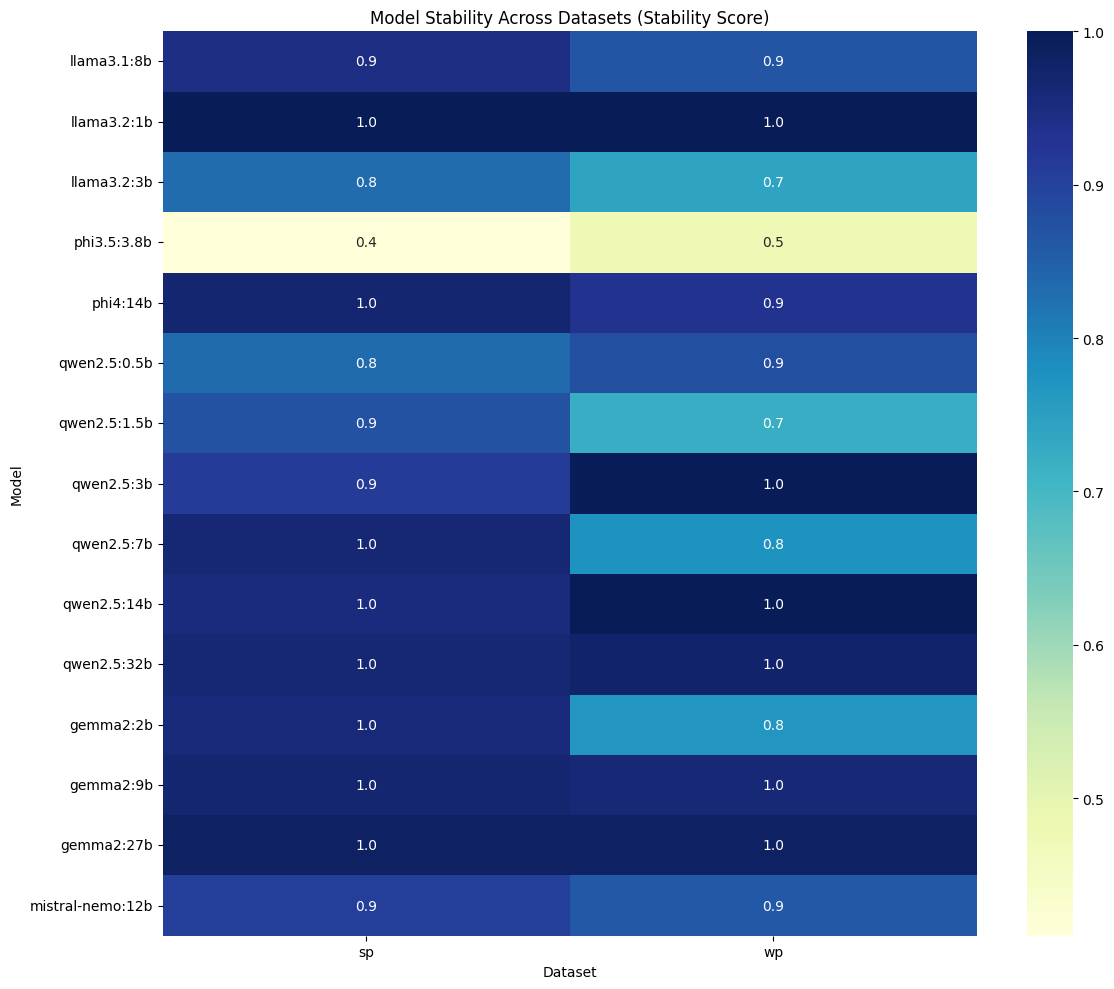

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scripts.evaluation import eval_model_results


def check_model_stability(total_results):
    model_stability = {}
    dataset_stability = {}

    run_names = list(total_results.keys())
    if not run_names:
        return {"error": "No runs found in results"}

    first_run = total_results[run_names[0]]
    datasets = list(first_run.keys())

    for dataset_name in datasets:
        models = list(first_run[dataset_name].keys())
        dataset_stability[dataset_name] = {}

        for model_name in models:
            run_scores = []
            for run_name in run_names:
                run_results = total_results[run_name]

                if (
                    dataset_name not in run_results
                    or model_name not in run_results[dataset_name]
                ):
                    continue

                run_score = eval_model_results(run_results[dataset_name][model_name])
                run_scores.append(run_score)

            if not run_scores:
                continue

            average_score = sum(run_scores) / len(run_scores)
            stability_score = (
                1 - (np.std(run_scores) / average_score) if average_score > 0 else 0
            )

            dataset_stability[dataset_name][model_name] = {
                "stability_score": stability_score,
                "average_score": average_score,
                "run_scores": run_scores,
            }

            if model_name not in model_stability:
                model_stability[model_name] = {}
            model_stability[model_name][dataset_name] = dataset_stability[dataset_name][
                model_name
            ]

    return {"by_dataset": dataset_stability, "by_model": model_stability}


def display_model_stability_analysis(stability_results):
    print("Model Stability Analysis\n")
    print("=" * 80)

    for model_name, datasets in stability_results["by_model"].items():
        print(f"\nModel: {model_name}")
        print("-" * 80)

        for dataset_name, metrics in datasets.items():
            stability = metrics["stability_score"]
            average_score = metrics["average_score"]
            run_scores = metrics["run_scores"]

            print(f"  Dataset: {dataset_name}")
            print(
                f"    Stability Score: {stability:.2f}, Average Score: {average_score:.2f}"
            )

            print(f"    Run Scores: {run_scores}")

    model_names = list(stability_results["by_model"].keys())
    dataset_names = list(stability_results["by_dataset"].keys())

    stability_matrix = np.zeros((len(model_names), len(dataset_names)))

    for i, model_name in enumerate(model_names):
        for j, dataset_name in enumerate(dataset_names):
            if dataset_name in stability_results["by_model"][model_name]:
                stability_matrix[i, j] = stability_results["by_model"][model_name][
                    dataset_name
                ]["stability_score"]

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        stability_matrix,
        annot=True,
        fmt=".1f",
        cmap="YlGnBu",
        xticklabels=dataset_names,
        yticklabels=model_names,
    )
    plt.title("Model Stability Across Datasets (Stability Score)")
    plt.ylabel("Model")
    plt.xlabel("Dataset")
    plt.tight_layout()
    plt.show()


stability_results = check_model_stability(total_results)
display_model_stability_analysis(stability_results)